In [1]:
#hide earrings 
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
df = pd.read_csv('suv_data.csv')

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


<AxesSubplot:xlabel='Gender', ylabel='count'>

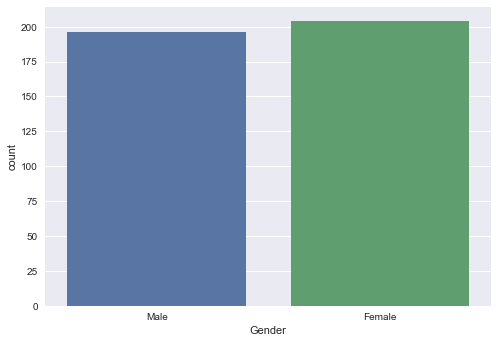

In [6]:
#viz
sns.countplot(x=df['Gender'])

<AxesSubplot:xlabel='Age', ylabel='count'>

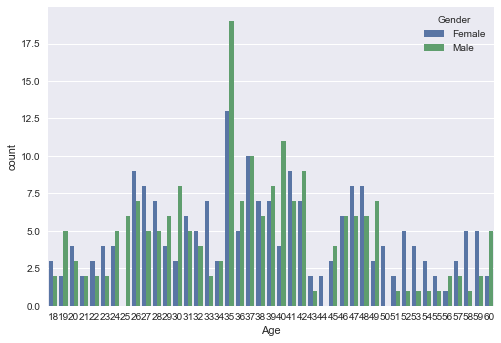

In [7]:
sns.countplot(x=df['Age'],hue=df['Gender'].sort_values())

<AxesSubplot:xlabel='Purchased', ylabel='count'>

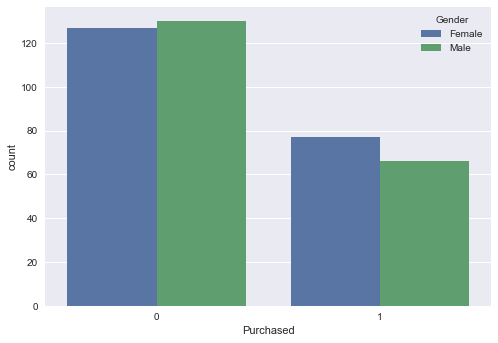

In [9]:
sns.countplot(x=df['Purchased'],hue=df['Gender'].sort_values())

<AxesSubplot:xlabel='Age', ylabel='count'>

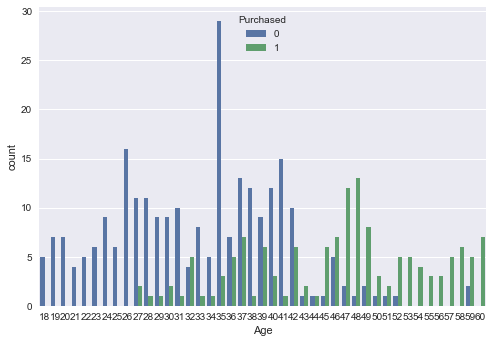

In [8]:
sns.countplot(x=df['Age'],hue=df['Purchased'].sort_values())

<AxesSubplot:>

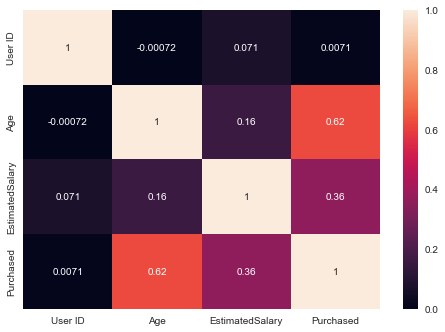

In [10]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
# female > male
# the age group 35 have high amount of gender though male than the female
# female > male in purchasing the suv
# after age of 27 people start purchasing SUV however 48 years old people are likely to buy suv 

In [11]:
#independent_variable
X = df.iloc[:,[2,3]].values
#dependent variable
y = df.iloc[:,4].values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [13]:
#StandardScaler() function to standardize the data values into a standard format
sc = StandardScaler()
#here we scaledown these input values
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [15]:
y_pred = classifier.predict(X_test)

In [16]:
accuracy_score(y_test,y_pred)*100
#89% people going to purchase the new suv

89.0

In [17]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.89      0.96      0.92        68\n           1       0.89      0.75      0.81        32\n\n    accuracy                           0.89       100\n   macro avg       0.89      0.85      0.87       100\nweighted avg       0.89      0.89      0.89       100\n'

In [18]:
confusion_matrix(y_test, y_pred)

array([[65,  3],
       [ 8, 24]], dtype=int64)